In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import scipy

# Import Raw Data

In [2]:
df0=pd.read_csv('Supplementary_Table5_CoV_Curated_RawData.csv')

In [5]:
df0.head()

,mata_description,matalpha_description,pred_aff,sample_name
0,CoV_binder_11_LH,SARS-CoV2 RBD,1.491227,1
1,CoV_binder_11_LH,SARS-CoV2 N501D,1.134922,1
2,CoV_binder_11_LH,BimBH3,3.080663,1
3,CoV_binder_11_LH,SARS-CoV2 G502D,1.054381,1
4,CoV_binder_11_LH,SARS-CoV1 RBD,2.643397,1


# Data processing

In [7]:
# Inputting not-measured interactions to lowest value in the set
df0.pred_aff=df0.pred_aff.fillna(np.max(df0.pred_aff))

df0['interaction'] = df0.mata_description + '$' + df0.matalpha_description 

df=df0.pivot(index='interaction', columns='sample_name', values='pred_aff').reset_index()
df[['mata','matalpha']] = df.interaction.str.split(expand=True,pat='$') 

df['aff_mean']= df[[1,2,3]].mean(axis=1)
df['aff_std']= df[[1,2,3]].std(axis=1)
df['aff_cv']= np.abs(df.aff_std / df.aff_mean)

df['aff_1_nm']= np.exp(df[1])
df['aff_2_nm']= np.exp(df[2])
df['aff_3_nm']= np.exp(df[3])

df['aff_mean_nm']= df[['aff_1_nm','aff_2_nm','aff_3_nm']].mean(axis=1)
df['aff_std_nm']= df[['aff_1_nm','aff_2_nm','aff_3_nm']].std(axis=1)
df['aff_cv_nm']= np.abs(df.aff_std_nm / df.aff_mean_nm) *100

df=df.sort_values(by='aff_mean')

In [8]:
df

sample_name,interaction,1,2,3,mata,matalpha,aff_mean,aff_std,aff_cv,aff_1_nm,aff_2_nm,aff_3_nm,aff_mean_nm,aff_std_nm,aff_cv_nm
2870,CoV_binder_32$MERS RBD,0.447948,-0.028283,0.118283,CoV_binder_32,MERS RBD,0.179316,0.243912,1.360235,1.565098,0.972113,1.125562,1.220924,0.307779,25.208720
263,BCL2$aBCL2,0.383443,-0.027146,0.197135,BCL2,aBCL2,0.184477,0.205587,1.114430,1.467327,0.973219,1.217909,1.219485,0.247058,20.259213
429,BFL1$BimBH3,0.439218,-0.006921,0.231948,BFL1,BimBH3,0.221415,0.223256,1.008316,1.551493,0.993103,1.261054,1.268550,0.279271,22.014949
3717,SARS_VHH72$LYRa11,0.456726,0.079388,0.228931,SARS_VHH72,LYRa11,0.255015,0.190016,0.745117,1.578896,1.082625,1.257256,1.306259,0.251738,19.271709
3760,SARS_VHH72$WIV1,0.479128,0.061126,0.252589,SARS_VHH72,WIV1,0.264281,0.209246,0.791757,1.614666,1.063032,1.287354,1.321684,0.277414,20.989467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,CoV_binder_16_HL$SARS-CoV2 K444Q,6.946023,6.946023,6.946023,CoV_binder_16_HL,SARS-CoV2 K444Q,6.946023,0.000000,0.000000,1039.009495,1039.009495,1039.009495,1039.009495,0.000000,0.000000
757,CoV_binder_12_HL$SARS-CoV2 E484A,6.946023,6.946023,6.946023,CoV_binder_12_HL,SARS-CoV2 E484A,6.946023,0.000000,0.000000,1039.009495,1039.009495,1039.009495,1039.009495,0.000000,0.000000
1186,CoV_binder_16_HL$SARS-CoV2 G446V,6.946023,6.946023,6.946023,CoV_binder_16_HL,SARS-CoV2 G446V,6.946023,0.000000,0.000000,1039.009495,1039.009495,1039.009495,1039.009495,0.000000,0.000000
2783,CoV_binder_30$SARS-CoV2 N439K+Y453F,6.946023,6.946023,6.946023,CoV_binder_30,SARS-CoV2 N439K+Y453F,6.946023,0.000000,0.000000,1039.009495,1039.009495,1039.009495,1039.009495,0.000000,0.000000


# Merging dataframe with antibody full names

In [9]:
names = pd.read_csv('Supplementary_Table6_AntibodiesNameFormats.csv')
names['Short_Name']=names.Short_Name + '_HL'

names2 = pd.read_csv('Supplementary_Table6_AntibodiesNameFormats.csv')
names2['Short_Name']=names2.Short_Name + '_LH'

names3 = pd.read_csv('Supplementary_Table6_AntibodiesNameFormats.csv')
names3['Short_Name']=names3.Short_Name

names4 = pd.concat([names,names2,names3])
names4.append(pd.DataFrame([['ACE2','ACE2']], columns=['Name','Short_Name']))

df=pd.merge(df,names4,left_on='mata',right_on='Short_Name',how='outer').reset_index(drop=True)
df=df.dropna(subset=['mata'])

df['LH']=df.mata.str.contains('_LH').replace({True: '_LH', False: ''})
df['HL']=df.mata.str.contains('_HL').replace({True: '_HL', False: ''})
df['Name2']=df.Name + df.LH + df.HL

In [10]:
df

,interaction,1,2,3,mata,matalpha,aff_mean,aff_std,aff_cv,aff_1_nm,...,aff_3_nm,aff_mean_nm,aff_std_nm,aff_cv_nm,Short_Name,Name,Name_extra,LH,HL,Name2
0,CoV_binder_32$MERS RBD,0.447948,-0.028283,0.118283,CoV_binder_32,MERS RBD,0.179316,0.243912,1.360235,1.565098,...,1.125562,1.220924,0.307779,25.208720,CoV_binder_32,VHH-21,VHH-21,,,VHH-21
1,CoV_binder_32$SARS-CoV1 RBD,1.549312,1.436536,1.340815,CoV_binder_32,SARS-CoV1 RBD,1.442221,0.104365,0.072364,4.708232,...,3.822158,4.245497,0.444348,10.466348,CoV_binder_32,VHH-21,VHH-21,,,VHH-21
2,CoV_binder_32$SARS-CoV2 V367F,2.318440,2.251035,1.874686,CoV_binder_32,SARS-CoV2 V367F,2.148054,0.239130,0.111324,10.159808,...,6.518774,8.725380,1.939453,22.227718,CoV_binder_32,VHH-21,VHH-21,,,VHH-21
3,CoV_binder_32$SARS-CoV2 G502D,2.302504,2.294015,1.854847,CoV_binder_32,SARS-CoV2 G502D,2.150455,0.256040,0.119063,9.999192,...,6.390718,8.768193,2.059388,23.487023,CoV_binder_32,VHH-21,VHH-21,,,VHH-21
4,CoV_binder_32$SARS-CoV2 N501D,2.218989,2.259607,2.037979,CoV_binder_32,SARS-CoV2 N501D,2.172192,0.117992,0.054319,9.198025,...,7.675084,8.817476,1.007542,11.426650,CoV_binder_32,VHH-21,VHH-21,,,VHH-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,ANeg2$SARS-CoV2 WT CODON 2,6.946023,6.946023,6.946023,ANeg2,SARS-CoV2 WT CODON 2,6.946023,0.000000,0.000000,1039.009495,...,1039.009495,1039.009495,0.000000,0.000000,ANeg2,ANeg2,ANeg2,,,ANeg2
3812,ANeg2$SARS-CoV2 S477N+A376T,6.946023,6.946023,6.946023,ANeg2,SARS-CoV2 S477N+A376T,6.946023,0.000000,0.000000,1039.009495,...,1039.009495,1039.009495,0.000000,0.000000,ANeg2,ANeg2,ANeg2,,,ANeg2
3813,ANeg2$SARS-CoV2 E484Q,6.946023,6.946023,6.946023,ANeg2,SARS-CoV2 E484Q,6.946023,0.000000,0.000000,1039.009495,...,1039.009495,1039.009495,0.000000,0.000000,ANeg2,ANeg2,ANeg2,,,ANeg2
3814,ANeg2$SARS-CoV2 A475V,6.946023,6.946023,6.946023,ANeg2,SARS-CoV2 A475V,6.946023,0.000000,0.000000,1039.009495,...,1039.009495,1039.009495,0.000000,0.000000,ANeg2,ANeg2,ANeg2,,,ANeg2


# Filtering for best chain orientation

In [16]:
#Selecting the best chain orientation for each antibody
df4=df[df.matalpha == 'SARS-CoV2 WT CODON 1']
df4=df4[df4.mata.str.contains("CoV")]
df4=df4.sort_values(by='Name').reset_index(drop=True)
df4=df4.loc[df4.reset_index().groupby(['Name'])['aff_mean'].idxmin()]
best_mata=df4.mata
df5=df[df.mata.str.contains("|".join(best_mata))]



df5['binderno']=pd.to_numeric(df5.mata.str.extract(r'(?:binder_)(\d+)').iloc[:,0])
df5=df5.sort_values(by='binderno').reset_index(drop=True)
df5[df5['matalpha'].str.contains('CODON')]

#df5 contains subset of data with best orientation binder to RBD

,interaction,1,2,3,mata,matalpha,aff_mean,aff_std,aff_cv,aff_1_nm,...,aff_mean_nm,aff_std_nm,aff_cv_nm,Short_Name,Name,Name_extra,LH,HL,Name2,binderno
25,CoV_binder_1_LH$SARS-CoV2 WT CODON 2,2.147948,2.167581,3.964597,CoV_binder_1_LH,SARS-CoV2 WT CODON 2,2.760042,1.043221,0.377973,8.567260,...,23.334471,25.430593,108.982939,CoV_binder_1_LH,Casirivimab,Casirivimab / REGN10933,_LH,,Casirivimab_LH,1
27,CoV_binder_1_LH$SARS-CoV2 WT CODON 4,2.133945,2.353977,3.403280,CoV_binder_1_LH,SARS-CoV2 WT CODON 4,2.630401,0.678314,0.257875,8.448131,...,16.346006,11.924263,72.949094,CoV_binder_1_LH,Casirivimab,Casirivimab / REGN10933,_LH,,Casirivimab_LH,1
38,CoV_binder_1_LH$SARS-CoV2 WT CODON 1,2.152791,2.279809,1.838983,CoV_binder_1_LH,SARS-CoV2 WT CODON 1,2.090528,0.226913,0.108543,8.608850,...,8.224601,1.773834,21.567414,CoV_binder_1_LH,Casirivimab,Casirivimab / REGN10933,_LH,,Casirivimab_LH,1
42,CoV_binder_1_LH$SARS-CoV2 WT CODON 3,2.036420,2.186264,2.181079,CoV_binder_1_LH,SARS-CoV2 WT CODON 3,2.134588,0.085055,0.039846,7.663127,...,8.473627,0.702291,8.287964,CoV_binder_1_LH,Casirivimab,Casirivimab / REGN10933,_LH,,Casirivimab_LH,1
60,CoV_binder_2_LH$SARS-CoV2 WT CODON 2,1.776832,1.322259,1.274158,CoV_binder_2_LH,SARS-CoV2 WT CODON 2,1.457750,0.277378,0.190278,5.911101,...,4.412892,1.300474,29.469888,CoV_binder_2_LH,Imdevimab,Imdevimab / REGN10987,_LH,,Imdevimab_LH,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,CoV_binder_32$SARS-CoV2 WT CODON 3,2.470941,2.295220,3.369924,CoV_binder_32,SARS-CoV2 WT CODON 3,2.712028,0.576489,0.212567,11.833571,...,16.945502,10.548771,62.251157,CoV_binder_32,VHH-21,VHH-21,,,VHH-21,32
1706,CoV_binder_33$SARS-CoV2 WT CODON 1,3.479399,4.035675,3.170453,CoV_binder_33,SARS-CoV2 WT CODON 1,3.561842,0.438463,0.123100,32.440222,...,37.613197,16.982952,45.151578,CoV_binder_33,VHH-55,VHH-55,,,VHH-55,33
1734,CoV_binder_33$SARS-CoV2 WT CODON 2,2.079121,4.087663,1.096933,CoV_binder_33,SARS-CoV2 WT CODON 2,2.421239,1.524435,0.629609,7.997433,...,23.530955,31.337092,133.173911,CoV_binder_33,VHH-55,VHH-55,,,VHH-55,33
1740,CoV_binder_33$SARS-CoV2 WT CODON 4,1.918481,3.406555,3.073526,CoV_binder_33,SARS-CoV2 WT CODON 4,2.799521,0.780961,0.278963,6.810603,...,19.529921,11.814494,60.494327,CoV_binder_33,VHH-55,VHH-55,,,VHH-55,33


# Heatmap of statistically significant variants

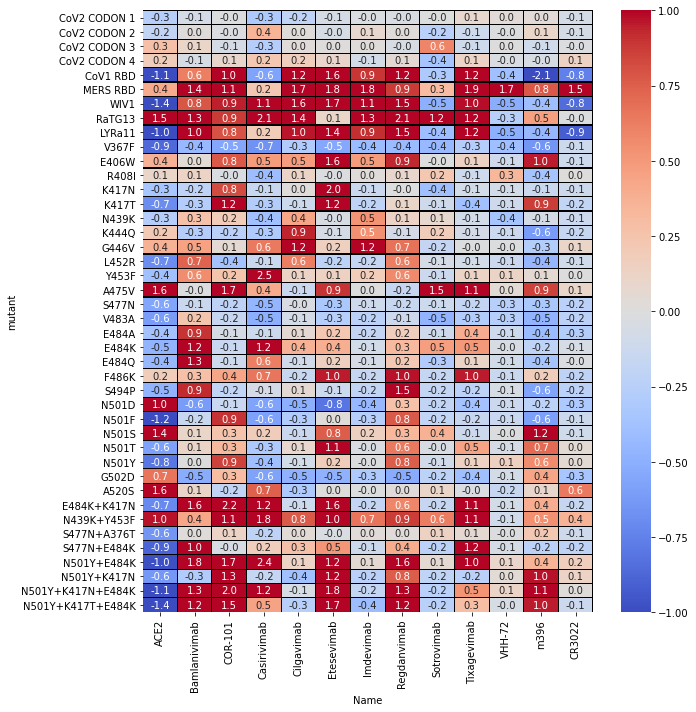

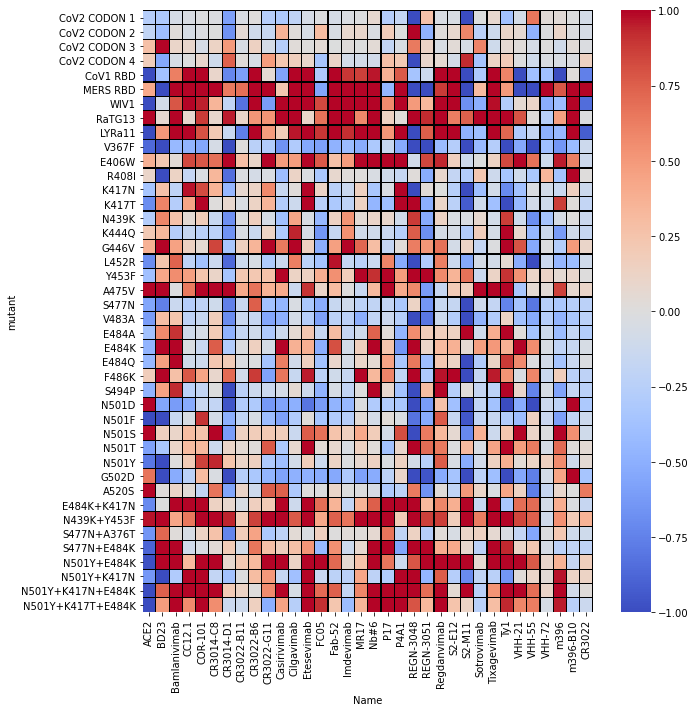

In [13]:
def heatmap1(dfphase,filepath,annotbool):
    #manually removed due to low expression / poor binding to ACE2
    dfphase=dfphase[~(dfphase.matalpha.str.contains("_A376T"))] 
    #manually removed CoV2 isogenic while keeping library COV2 WT
    dfphase=dfphase[~(dfphase.matalpha.str.contains("'SARS-CoV2_RBD'"))] 

    #Calculating p-value for all mutants based by comparing against WT replicates

    binderlist=[]
    mutantlist=[]
    plist=[]
    foldlist=[]

    for xbinder in range(0,len(dfphase.mata.unique())):
        dftemp=dfphase[dfphase.mata == dfphase.mata.unique()[xbinder]]
        dfwt=dftemp[dftemp.matalpha.str.contains('CODON')]
        wt_samples = list(dfwt[1].dropna()) + list(dfwt[2].dropna()) + list(dfwt[3].dropna()) 
        for xmut in range(0,len(dfphase.matalpha.unique())):
            dfmut=dftemp[dftemp.matalpha == dfphase.matalpha.unique()[xmut]]
            mut_samples = list(dfmut[1].dropna()) + list(dfmut[2].dropna()) + list(dfmut[3].dropna()) 
            [stat, p] = scipy.stats.mannwhitneyu(mut_samples, wt_samples)
            plist.append(p)
            foldlist.append(np.mean(mut_samples)-np.mean(wt_samples))
            binderlist.append(dfphase.mata.unique()[xbinder])
            mutantlist.append(dfphase.matalpha.unique()[xmut])

    pdf=pd.DataFrame({'mutant':mutantlist,'binder':binderlist,'p':plist,'fold':foldlist})

    pdf=pdf.merge(names4,left_on='binder',right_on='Short_Name')

    pdf.mutant= pdf.mutant.str.replace('SARS-', '')
    pdf.mutant= pdf.mutant.str.replace('CoV2 ', '')
    pdf.mutant= pdf.mutant.str.replace('WT CODON', 'CoV2 CODON')

    foldpivot=pdf.pivot(columns='Name',index='mutant',values='fold')

    ## Moving CR3022 to the back
    dftemp = foldpivot.pop('CR3022') # remove column b and store it in df1
    foldpivot['CR3022']=dftemp # add b series as a 'new' column.

    ##

    newindex=['CoV2 CODON 1',
     'CoV2 CODON 2',
     'CoV2 CODON 3',
     'CoV2 CODON 4',
     'CoV1 RBD',
     'MERS RBD',
     'WIV1',
     'RaTG13',
     'LYRa11',
     'V367F',
     'E406W', 
     'R408I',
     'K417N',
     'K417T',
     'N439K',
     'K444Q',
     'G446V',
     'L452R',
     'Y453F',
     'A475V', 
     'S477N',
     'V483A',
     'E484A',
     'E484K',
     'E484Q',
     'F486K',
     'S494P',
     'N501D',
     'N501F',
     'N501S',
     'N501T',
     'N501Y', 
     'G502D',
     'A520S',
     'E484K+K417N',
     'N439K+Y453F',
     'S477N+A376T',
     'S477N+E484K',
     'N501Y+E484K',
     'N501Y+K417N',
     'N501Y+K417N+E484K',
     'N501Y+K417T+E484K',]

    foldpivot=foldpivot.reindex(index = newindex)

    #Plotting heatmap

    import matplotlib
    matplotlib.rcParams.update({'font.size': 10})
    plt.figure(figsize=(10,10))
    sns.heatmap(foldpivot,cmap='coolwarm',annot=annotbool,
                vmin=-1,vmax=1,linewidth=.1,
                linecolor='black', fmt=".1f",cbar=True)
    plt.tight_layout()
    plt.savefig(filepath,dpi=300)
    plt.show()
    return(foldpivot)
    
    


#Plotting clinical antibodies heatmap 
a=df5[df5.binderno < 10]
c=df[df.mata.str.contains('ACE2')|
    (df.mata.str.contains('CoV_binder_29'))|
    (df.mata.str.contains('CoV_binder_24_LH'))|
    (df.mata.str.contains('CoV_binder_25_HL'))] #VHH72
dfphase=pd.concat([a,c]) 
heatmap1(dfphase,'./figures/clinical_abs_heatmap.png',annotbool=True)

#Plotting all antibodies heatmap 
a=df5
c=df[df.mata.str.contains('ACE2')|
    (df.mata.str.contains('CoV_binder_29'))|
    (df.mata.str.contains('CoV_binder_24_LH'))|
    (df.mata.str.contains('CoV_binder_25_HL'))] #VHH72
dfphase=pd.concat([a,c]) 
foldpivot=heatmap1(dfphase,'./figures/all_abs_heatmap.png',annotbool=False)

foldpivot.to_csv('Supplementary_Table9_CuratedFoldDiffAllAbs.csv')